In [66]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

import keras

In [79]:
model = load_model(
    "/models/segmentation_model_1",   # ← folder, NOT file
    compile=False
)



<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\chanu\AppData\Local\Temp\ipykernel_20448\367765639.py:2: SyntaxWarning: invalid escape sequence '\G'
  "C:\Github Projects\DSGP-Brain-Tumor-Detection\models\\segmentation_model_1",   # ← folder, NOT file


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


<>:32: SyntaxWarning: invalid escape sequence '\I'
<>:32: SyntaxWarning: invalid escape sequence '\I'
C:\Users\chanu\AppData\Local\Temp\ipykernel_20448\1070833033.py:32: SyntaxWarning: invalid escape sequence '\I'
  display_image_mask(model, "C:\IIT campus\Second Year\DSGP\pari\\12\MRI-meningioma.jpg")


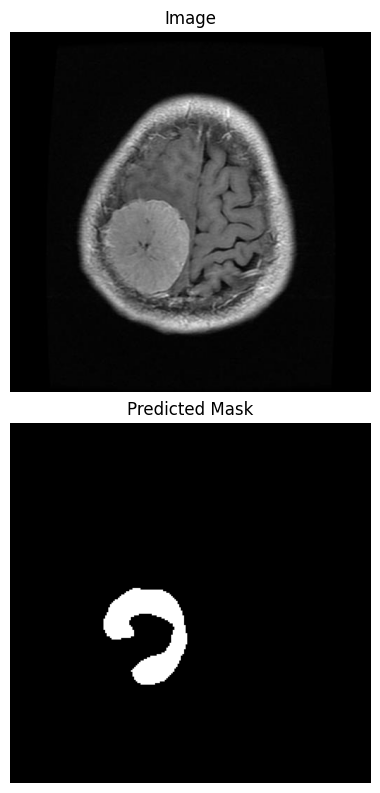

In [46]:
def display_image_mask(   model, image_files ):
    image = cv2.imread(image_files)
        # --- Preprocess for visualization ---
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # --- Plot original image, mask, and overlay ---
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Image')
    plt.axis('off')


    # --- Preprocess for model prediction ---
    img_resized = cv2.resize(image_rgb, (224, 224))
    img_resized = img_resized / 255.0  # normalize
    img_resized = np.expand_dims(img_resized, axis=0)  # shape: (1, 224, 224, 3)

    # --- Predict mask ---
    y_pred = model.predict(img_resized)
    y_pred = (y_pred > 0.5).astype(np.uint8)

    plt.subplot(2, 3, 4)
    plt.imshow(y_pred[0], cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

display_image_mask(model, "C:\IIT campus\Second Year\DSGP\pari\\12\MRI-meningioma.jpg")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

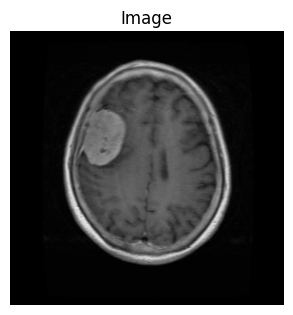

In [37]:
image = cv2.imread(r"C:\IIT campus\Second Year\DSGP\pari\\16\meningioma.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Image')
plt.axis('off')


In [15]:
print(image.shape)


(512, 512, 3)


In [13]:
img_resized = cv2.resize(image_rgb, (224, 224))
img_resized = img_resized / 255.0  # normalize
img_resized = np.expand_dims(img_resized, axis=0)  # shape: (1, 224, 224, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

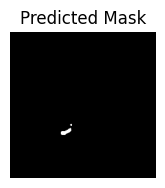

In [14]:
y_pred = model.predict(img_resized)
y_pred = (y_pred > 0.5).astype(np.uint8)

plt.subplot(2, 3, 4)
plt.imshow(y_pred[0], cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')